In [2]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [3]:
#load data
train_df = pd.read_csv("../prod_corpus/csharp_train_shuffle.csv",encoding='gb2312')
train_df.label = train_df.label.astype('category')

valid_df = pd.read_csv("../prod_corpus/csharp_valid_shuffle.csv",encoding='gb2312')
test_df = pd.read_csv("../prod_corpus/csharp_test_shuffle.csv",encoding='gb2312')

In [4]:
train_df.describe()

,query,code,label
count,105498,105498,105498
unique,52731,51828,2
top,cross-thread operation not valid : control TAG...,List < T >,1
freq,6,34,52749


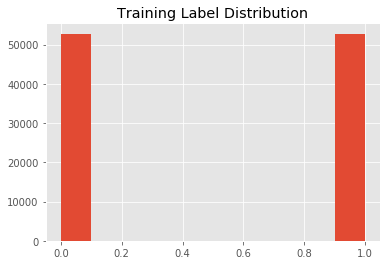

In [5]:
#label Distribution
train_df.label.hist() 
plt.title("Training Label Distribution")

In [6]:
pd.options.display.max_colwidth =200
train_df.head()

,query,code,label
0,regex check second letter of string,Type . GetGenericTypeDefinition,1
1,parsing xml with inner nodes ?,var result = session . QueryOver < Users > ( ) . Right . JoinQueryOver < Roles > ( x = > x . UserId ) . Where ( c = > c . RoleId == roleid ) . TransformUsing ( Transformers . DistinctRootEntity ) ...,1
2,com interop via classic asp,"public int Add ( int val1 , int val2 , out object outputz ) { int total = val1 + val2 ; outputz = new object [ COD_INT ] { COD_STR , COD_STR , COD_STR , COD_STR , COD_STR } ; return total ; }",0
3,linq to nhibernate return entities whose name starts with contents of string list,"var result = input . ToString ( ) . PadLeft ( length , COD_CHAR ) ;",1
4,get single record from observablecollection,else if ( ! ( e . KeyValue >= COD_INT && e . KeyValue <= COD_INT ) || textBox1 . Text . Length == COD_INT ) { e . SuppressKeyPress = ! ( e . KeyCode == Keys . Back || e . KeyCode == Keys . Left ||...,1


count    105498.000000
mean          9.726516
std           3.993532
min           1.000000
25%           7.000000
50%           9.000000
75%          12.000000
max         110.000000
Name: query, dtype: float64
count    105498.000000
mean         49.932814
std          41.618459
min           1.000000
25%          18.000000
50%          38.000000
75%          71.000000
max         490.000000
Name: code, dtype: float64


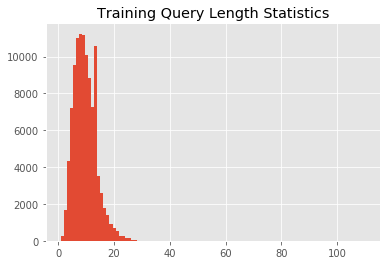

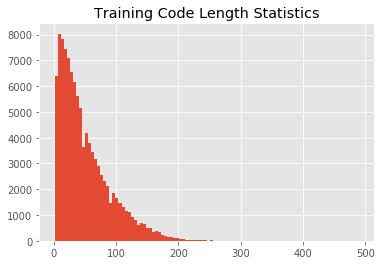

In [7]:
plt.figure(1)
train_df_query_len = train_df['query'].str.split(" ").apply(len)
train_df_query_len.hist(bins=100)
plt.title("Training Query Length Statistics")
print(train_df_query_len.describe())

plt.figure(2)
train_df_code_len = train_df['code'].str.split(" ").apply(len)
train_df_code_len.hist(bins=100)
plt.title("Training Code Length Statistics")
print(train_df_code_len.describe())

In [8]:
pd.options.display.max_colwidth =100
valid_df.head()

,query,true_code,false_0,false_1,false_2,false_3,false_4,false_5,false_6,false_7,false_8
0,how to stub a method conditionally with vs fakes ?,var stub = new StubIObject { Foo = ( value ) = > { if ( value == COD_INT ) return value * COD_RE...,var sortedList = ordersList . OrderBy ( p = > p . ProductName ) . ToList ( ) ;,[ TestFixture ] public class DynamicJson { [ Test ] public void Test ( ) { dynamic flexible = ne...,static class DataPointExtensions { public static DataPoint Average ( this IEnumerable < DataPoin...,WshShell shell = new WshShell ( ) ; string app = Path . Combine ( Environment . SystemDirectory ...,Stack < ParseTreeNode > stack = new Stack { yourRootTreeNode } ; while ( ! stack . Empty ) { var...,foreach ( GridViewRow row in GridView1 . Rows ) { if ( row . RowType == DataControlRowType . Dat...,height = DataGridHeight - Height of all rows except last one,if ( ddl . Items . Count <= COD_INT ) { e . Cancel = true ; },class myClass { public readonly int Value1 ; public readonly string Value2 ; public myClass ( in...
1,how do i get the file contents of a multipartmemorystreamprovider as a byte array ?,i . ReadAsByteArrayAsync ( ),int minPrice = closingsBook . Min ( book = > book . LimitPrice ) ; var indexes = closingsBook . ...,"protected void Repeater1_ItemDataBound ( object sender , RepeaterItemEventArgs e ) { if ( e . It...",XDocument xml = XDocument . Load ( COD_STR ) ; var firstElement = xml . Descendants ( ) . Where ...,BitmapImage bimg = new BitmapImage ( ) ; bimg . CreateOptions = BitmapCreateOptions . Background...,protected override bool ProcessDialogKey ( Keys keyData ) { int selectionIndex = pBoundsCollecti...,"private void Media_Ended ( object sender , EventArgs e ) { media . Position = TimeSpan . Zero ; ...",~ YourClass,"string input = "" [ PC ( name = \ "" PC1 \ "" , ip = \ "" COD_REAL COD_REAL COD_REAL \ "" , subnet = ...",control1 . . . . control2 . . . . < / div >
2,datagridview with enums only sets default value in bindinglist,"private void DataGridView_CellValueChanged ( object sender , DataGridViewCellEventArgs e ) { thi...",var orders = db . Orders . Where ( ord = > ( isFirstConditionRelevant && ord . Channel == COD_IN...,internal interface IServiceAInternal { ServiceResponse ProcessFromServiceB ( ServiceRequest requ...,var q = xml . XPathSelectElements ( COD_STR ) ;,public partial class Form1 : Form { public Form1 ( ) { InitializeComponent ( ) ; } private void ...,var dict = new System . Collections . Specialized . HybridDictionary ( ) ; dict . Add ( COD_INT ...,Windows . UI . Text . ITextSelection selection = richEditBox . Document . Selection ; selection ...,DataGridViewLinkCell linkCell = dcell as DataGridViewLinkCell if ( linkCell != null ),object dobVal = null ; while ( ( dobVal = reader . Read ( ) ) != null ) { var storedDob = Conver...,byte [ ] file = System . Convert . FromBase64String ( encodedData ) ; File . WriteAllBytes ( dir...
3,"marshaling a struct while keeping it "" unmanaged ""","using System . Runtime . InteropServices ; . . . [ StructLayout ( LayoutKind . Sequential , Char...",Stream responseStream = null ; try { WebRequest request = WebRequest . Create ( COD_STR ) ; WebR...,var result = from stu in SyStudent join schsta in syschoolstatus on stu . syschoolstatusid equal...,"ds . Tables [ COD_INT ] . Columns . Add ( COD_STR , typeof ( String ) ) ; foreach ( DataRow row ...","static void RunThreads ( int totalThreads , int throttle ) { Observable . Range ( COD_INT , tota...",string x = COD_STR + COD_STR + COD_STR + COD_STR ; int searchBeforeLocation = x . LastIndexOf ( ...,var reader = new StreamReader ( Request . InputStream ) ; var json = reader . ReadToEnd ( ) ; cm...,public static readonly DependencyProperty IsInReadModeProperty = DependencyProperty . Register (...,Reminder myReminder = new Reminder ( COD_STR ) ; myReminder . Title = COD_STR ; myReminder . Con...,"using ( FileStream fsStream = new FileStream ( COD_STR , FileMode . Create ) ) using ( BinaryWri..."
4,insert

In [9]:
valid_df.describe()

,query,true_code,false_0,false_1,false_2,false_3,false_4,false_5,false_6,false_7,false_8
count,6594,6594,6594,6594,6594,6594,6594,6594,6594,6594,6594
unique,6593,6573,4153,4129,4125,4162,4183,4166,4134,4165,4153
top,link button control using asp . net,Process . Start ( COD_STR ) ;,[ assembly : InternalsVisibleTo ( COD_STR ) ],List < T >,this . _chart . ChartAreas [ COD_INT ] . AxisX . CustomLabels . Add ( new CustomLabel ( position...,WshShell shell = new WshShell ( ) ; string app = Path . Combine ( Environment . SystemDirectory ...,"var Enumerable . Range ( COD_INT , COD_INT ) . Join ( MyTable . GroupBy ( x = > x . TableDate . ...",Process . Start ( COD_STR ) ;,BaseAnimal myAnimal ; if ( someVar ) { var myCat = new cat ( ) ; myAnimal = myCat ; } else { var...,Astr = new String ( AByte . Select ( b = > ( Char ) ( b + COD_INT ) ) . ToArray ( ) ),Process . Start ( COD_STR ) ;
freq,2,4,7,8,6,6,6,9,7,8,7


In [10]:
pd.options.display.max_colwidth =100
test_df.head()

,query,true_code,false_0,false_1,false_2,false_3,false_4,false_5,false_6,false_7,false_8
0,how to delete the auto-generate first line in a richtextbox,rt . Document . Blocks . Remove ( rt . Document . Blocks . FirstBlock ) ;,[ UnmanagedFunctionPointer ( CallingConvention . Cdecl ) ] delegate void AnotherMethodDelegate (...,var doc = XDocument . Load ( . . . ) ; XNamespace envNs = COD_STR ; var fromUri = doc . Root . E...,[ KnownType ( COD_STR ) ] public class Section { static Type [ ] GetKnownType ( ) { return new [...,"private void listBox1_DrawItem ( object sender , DrawItemEventArgs e ) { MyListBoxItem item = li...","private bool _isCheckedActivated = true ; private void BestelIndexSearch ( object sender , Event...",var allemps = empService . GetAllEmployees ( ) ; IEnumerable < Emp > emps ; if ( allemps . IsFre...,"protected void btnInsert_Click ( object sender , EventArgs e ) { String connectionString = Confi...",protected void OnMyEvent ( EventArgs e ) { EventHandler handler = MyEvent ; if ( handler != null...,Parallel . For
1,obtain a collection of generic types from pagedcollectionview,public interface ISelectable { pubilc bool IsSelected { get ; } } public class ItemType < T > : ...,foreach ( XmlNode subCollection in xml . SelectNodes ( COD_STR ) ) { subCollection . ParentNode ...,string sqlCommandStatement = string . Format ( COD_STR UPDATE users SET { COD_INT } = @somedata ...,"DECLARE @txt varchar ( max ) SET @txt = ' ' SELECT @txt = @txt + [ DocumentName ] + ' , ' FROM [...",var dbEnc = Encoding . UTF8 ; var uniEnc = Encoding . Unicode ; byte [ ] dbBytes = dbEnc . GetBy...,ISingleResult < MySPResult > spResult = DataContext . MySP ( params ),if ( dataGridView . FirstDisplayedScrollingRowIndex + dataGridView . DisplayedRowCount ( false )...,bool threeBool = ! string . IsNullOrEmpty ( read [ COD_STR ] . ToString ( ) ) ; lblInc3 . Visibl...,scheduler . Initialview = COD_STR ;,Thread t = new Thread ( new ParameterizedThreadStart ( myMethod ) ) ; t . Start ( myParameterObj...
2,implementing ixmlserializable on a collection object,public void ReadXml ( System . Xml . XmlReader reader ) { reader . Read ( ) ; this . C = reader ...,"public Project CreateProject ( object projectName , object hoursPerDay , object hoursPerWeek , o...",public const uint LVM_SETHOTCURSOR = COD_INT ; [ DllImport ( COD_STR ) ] public static extern In...,var bytesToDecrypt = Convert . FromBase64String ( COD_STR ) ; AsymmetricCipherKeyPair keyPair ; ...,FormsAuthentication . SignOut ( ) ; Response . Redirect ( COD_STR ) ;,"public string GetMatchingCompanies ( string term , int companyPickerMode , int ? officeId = null...",pi . CreateNoWindow = true ;,trainingConsultant . TrainingId = training . Id ; trainingConsultant . ConsultantId = consultant...,"cmd2 = new OleDbCommand ( COD_STR + PageSize + COD_STR , con ) ;",var selectedItem = CheckBoxList1 . SelectedItem ;
3,how to make a usercontrols backcolor transparent in c # ?,var pos = this . PointToScreen ( userControl11 . Location ) ; userControl11 . Parent = pictureBo...,lst . OrderBy ( t = > t . Code_PK_OriginalValue ) ;,IEnumerable < Foo > myFoos = bar . GetFoos ( ) . Where ( f = > ( f . Value1 == value1 ) && ( f ....,CREATE PROCEDURE GetSequenceOfWareHouse @WareHouse char ( COD_INT ) AS BEGIN SET NOCOUNT ON ; DE...,public String DecryptPassword { get { return Decrypt ( this . Pin ) ; } },string pattern = COD_STR ; string sentence = COD_STR ; IList < int > indeces = new List < int > ...,Encoding . UTF8 . GetByteCount ( builder . ToString ( ) ) ;,radListView1 . Items [ COD_INT ] . CheckState = ToggleState . On ;,Public Sub GetPageNumber ( ) On Error GoTo MyErrorHandler Dim currentDocument As Document Set cu...,Stream stream = File . Open ( date . ToString ( ) + COD_STR ) ; FileMode . Open ) ;
4,calculate to sum of TAG_INT ^ TAG_INT without using bigint,digits = [ COD_INT ] for n in range ( COD_INT ) : newdigits = [ ] carry = COD_INT for digit in d...,var lista = flights . Select ( f = > f . CompanyI

In [11]:
test_df.describe()

,query,true_code,false_0,false_1,false_2,false_3,false_4,false_5,false_6,false_7,false_8
count,6593,6593,6593,6593,6593,6593,6593,6593,6593,6593,6593
unique,6592,6575,4145,4115,4156,4179,4198,4153,4150,4156,4158
top,invalid length for a base-TAG_INT char array,Response . Write ( COD_STR ) ;,"CREATE TABLE YourTable ( Id INT IDENTITY ( COD_INT , COD_INT ) PRIMARY KEY , . . . . . . . ) ;","routes . MapRoute ( COD_STR , COD_STR , new { controller = COD_STR , action = COD_STR } ) ;","ctx . Cache . Insert ( COD_STR , stModel , null , MyClass . getSpecificDateTime ( ) , System . W...","DateTime date = DateTime . ParseExact ( EnteredDate , COD_STR , CultureInfo . InvariantCulture )...","public static bool IsMatch ( string pattern , string line ) { var patternSplit = pattern . Split...","Canvas . SetTop ( path , COD_INT ) ; Canvas . SetLeft ( path , COD_INT ) ;",string value = myDictionary . First ( v = > StringComparer . Create ( CultureInfo . CurrentCultu...,using System ; using System . Linq . Expressions ; using Db4objects . Db4o . Linq . Expressions ...,public bool CheckMyStringValues ( params string [ ] strings )
freq,2,2,7,7,6,6,6,7,7,7,7
